In [1]:
import numpy as np
import gym
import cv2
import matplotlib.pyplot as plt

# CNN Preprocessing 

Preprocessing, stacking and CNN architecture are based on the [DQN-Paper](https://web.stanford.edu/class/psych209/Readings/MnihEtAlHassibis15NatureControlDeepRL.pdf)

Preprocessing of the DQN CNN:
- 1. grayscaling the image to a shape (1, 210, 160)
- 2. Resizing the image to 110x84
- 3. cropping the image to a shape of (1, 84, 84)

In [12]:
env = gym.make("Pong-v0")

In [13]:
state = env.reset()
print(state.shape)

(210, 160, 3)


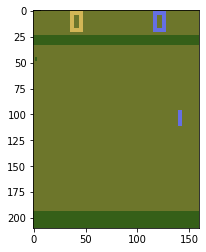

In [14]:
plt.imshow(state)
plt.show()

# Grayscaling

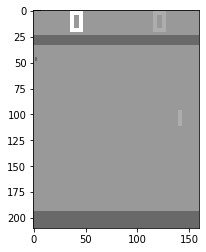

In [15]:
gray = cv2.cvtColor(state, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

# Resizing

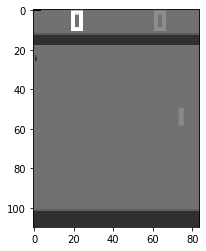

(110, 84)


In [16]:
resized = cv2.resize(gray, (84,110))
plt.imshow(resized, cmap="gray")
plt.show()
print(resized.shape)

# Cropping the image

Cropping the image to 84×84

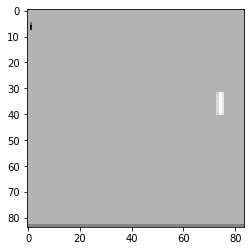

(84, 84)


In [17]:
cropped = resized[18:102,:]
plt.imshow(cropped, cmap="gray")
plt.show()
print(cropped.shape)

# Stacking the for last screens

In [18]:
print(cropped.shape)
cropped = cropped.reshape((1,84,84))
print(cropped.shape)

(84, 84)
(1, 84, 84)


In [19]:
stacked = np.vstack([cropped, cropped, cropped, cropped])
stacked.shape

(4, 84, 84)

In [20]:
# adding new state 
new_state = np.ones((1,84,84))

In [21]:
added = stacked[:3,:,:]
added = np.concatenate((new_state, added))
print(added.shape)

(4, 84, 84)


# Building the CNN for the DQN

Building the original CNN of the DQN Paper

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
# building the convolution layers for testing

In [57]:
cnn_1 = nn.Conv2d(4, out_channels=32, kernel_size=8, stride=4)
cnn_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)
cnn_3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)

In [95]:
img = torch.from_numpy(stacked).float().unsqueeze(0)

In [60]:
x = cnn_1(img)
print("shape first layer: ", x.shape)
x = cnn_2(x)
print("shape second_layer: ", x.shape)
x = cnn_3(x)
print("shape third_layer: ", x.shape)

shape first layer:  torch.Size([1, 32, 20, 20])
shape second_layer:  torch.Size([1, 64, 9, 9])
shape third_layer:  torch.Size([1, 64, 7, 7])


In [67]:
flattened_input = x.flatten()
input_shape = x.flatten().shape[0]
print("input_shape:", input_shape)

input_shape: 3136


In [74]:
ff_1 = nn.Linear(input_shape, 512)
ff_2 = nn.Linear(512, env.action_space.n)

# Building the final DQN class

In [17]:
class DQN(nn.Module):
    def __init__(self, action_size, input_shape = (4,84,84)):
        super(DQN, self).__init__()
        self.input_shape = input_shape
        self.action_size = action_size
        self.cnn_1 = nn.Conv2d(4, out_channels=32, kernel_size=8, stride=4)
        self.cnn_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)
        self.cnn_3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        
        self.ff_1 = nn.Linear(self.calc_input_layer(), 512)
        self.ff_2 = nn.Linear(512, action_size)
        
    def calc_input_layer(self):
        x = torch.zeros(self.input_shape).unsqueeze(0)
        x = self.cnn_1(x)
        x = self.cnn_2(x)
        x = self.cnn_3(x)
        return x.flatten().shape[0]
    
    def forward(self, x):
        """
        
        """
        x = torch.relu(self.cnn_1(x))
        x = torch.relu(self.cnn_2(x))
        x = torch.relu(self.cnn_3(x))
        x = x.flatten()
        x = torch.relu(self.ff_1(x))
        out = self.ff_2(x)
        
        return out

In [18]:
dqn = DQN(4)

In [19]:
dqn

DQN(
  (cnn_1): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
  (cnn_2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
  (cnn_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (ff_1): Linear(in_features=3136, out_features=512, bias=True)
  (ff_2): Linear(in_features=512, out_features=4, bias=True)
)

In [103]:
dqn(img)

tensor([ 4.2489, -3.7532,  0.4237, -4.3808], grad_fn=<AddBackward0>)

In [4]:
import matplotlib.pyplot as plt

In [8]:
start_eps = 1
end_eps = 0.5
annhealing_frames = 1000
max_frames = 10000

In [11]:
eps = []
for i in range(max_frames):
    if i <= annhealing_frames:
        eps.append(max(start_eps - (i*(1/annhealing_frames)), end_eps))
    else:
        eps.append(end_eps - end_eps*((i-annhealing_frames)/(max_frames-annhealing_frames)))
        print()
    

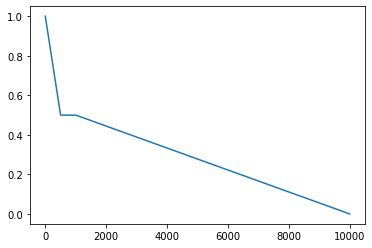

In [12]:
plt.plot(eps)

In [13]:
eps

[1.0,
 0.999,
 0.998,
 0.997,
 0.996,
 0.995,
 0.994,
 0.993,
 0.992,
 0.991,
 0.99,
 0.989,
 0.988,
 0.987,
 0.986,
 0.985,
 0.984,
 0.983,
 0.982,
 0.981,
 0.98,
 0.979,
 0.978,
 0.977,
 0.976,
 0.975,
 0.974,
 0.973,
 0.972,
 0.971,
 0.97,
 0.969,
 0.968,
 0.967,
 0.966,
 0.965,
 0.964,
 0.963,
 0.962,
 0.961,
 0.96,
 0.959,
 0.958,
 0.957,
 0.956,
 0.955,
 0.954,
 0.953,
 0.952,
 0.951,
 0.95,
 0.949,
 0.948,
 0.947,
 0.946,
 0.945,
 0.944,
 0.943,
 0.942,
 0.941,
 0.94,
 0.9390000000000001,
 0.938,
 0.937,
 0.9359999999999999,
 0.935,
 0.9339999999999999,
 0.933,
 0.9319999999999999,
 0.931,
 0.9299999999999999,
 0.929,
 0.9279999999999999,
 0.927,
 0.926,
 0.925,
 0.924,
 0.923,
 0.922,
 0.921,
 0.92,
 0.919,
 0.918,
 0.917,
 0.916,
 0.915,
 0.914,
 0.913,
 0.912,
 0.911,
 0.91,
 0.909,
 0.908,
 0.907,
 0.906,
 0.905,
 0.904,
 0.903,
 0.902,
 0.901,
 0.9,
 0.899,
 0.898,
 0.897,
 0.896,
 0.895,
 0.894,
 0.893,
 0.892,
 0.891,
 0.89,
 0.889,
 0.888,
 0.887,
 0.886,
 0.885,
 0.884,

In [15]:
0.5 - 0.5*(1/9000)

0.49994444444444447